<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>

# Chapter 4: Skymap and DECam

In this chapter we show how `skymap` can interface with different astronomical surveys and instruments. Here, we specifically examine some of the features for the Dark Energy Survey (DES; [DES Collaboration 2005](https://arxiv.org/abs/astro-ph/0510346)) and the Dark Energy Camera (DECam; [Flaugher et al. 2015](https://arxiv.org/abs/1504.02900)).


In [1]:
# Basic notebook imports
%matplotlib inline

import os
import matplotlib
import pylab as plt
import numpy as np
import healpy as hp

We start by importing several classes from the skymap module and setting a few constants that we will use in this example. By this point, these modules and classes should be familiar.

In [2]:
import skymap
from skymap.constants import FIGSIZE,SCALE,DPI,DECAM
from skymap.utils import get_datadir
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

NSIDE = 64

When plotting DES data, it is often convenient to use an inset colorbar placed between the SPT and Stripe82 regions. This is demonstrated with `DESSkymap` below.

(<matplotlib.colorbar.Colorbar at 0x11325ec10>,
 <mpl_toolkits.axes_grid1.parasite_axes.AxesHostAxes at 0x11323d950>)

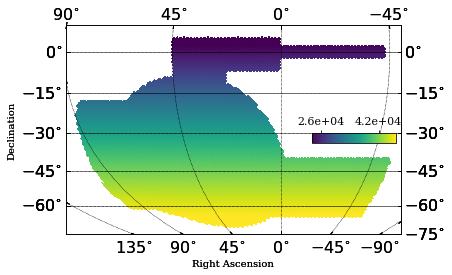

In [3]:
filename = os.path.join(get_datadir(),'des-round13-poly.txt')
vertices = np.loadtxt(filename)
vertices[:,0] -= 360*(vertices[:,0] > 180)
path = matplotlib.path.Path(vertices)

hpxmap = hp.UNSEEN*np.ones(hp.nside2npix(NSIDE))
pixels = np.arange(hp.nside2npix(NSIDE))
ra,dec = hp.pix2ang(NSIDE,pixels,lonlat=True)
ra -= 360*(ra > 180)
sel = path.contains_points(np.array([ra,dec]).T)

hpxmap[sel] = pixels[sel]

smap = DESSkymap()
smap.draw_hpxmap(hpxmap,xsize=400)
smap.draw_inset_colorbar(ticks=[2.6e4,4.2e4])

We have implemented several tools to plot the DECam focal plane. The first uses a quick and dirty scatter plot. Beware, the scatter points do not scale if the figure or axis is resized!

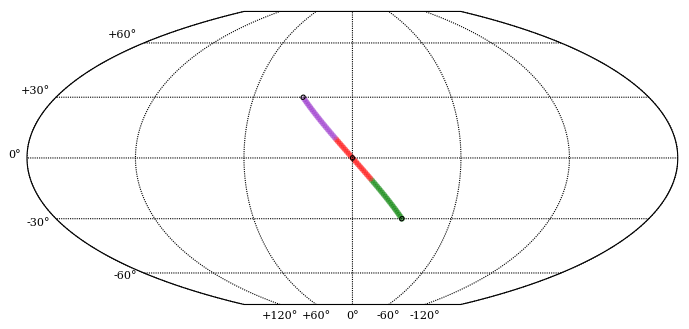

In [4]:
ra = dec = np.arange(-30,30)
band = 20*['g']+20*['r']+20*['z']
fields = np.rec.fromarrays([ra,dec,band],dtype=[('ra',float),('dec',float),('band',object)])

# Careful, the scatter point size depends on the figure and is currently not accurate
plt.figure(figsize=FIGSIZE,dpi=DPI)
smap = SurveyMcBryde()
smap.draw_fields(fields,alpha=0.5,s=30)

# The way to check that the size is ok is to use a tissot with prescribed radius
for x,y in [(-30,-30),(0,0),(30,30)]:
    smap.tissot(x,y,DECAM,100,edgecolor='k',facecolor='none')

The second plotting uses a much more accurate (but slower) `PolygonCollection` to represent the focal plane at CCD level.

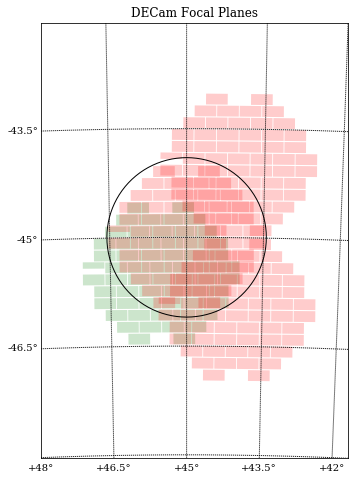

In [6]:
ra,dec = 45,-45
radius = 1.5
delta = 1.0

plt.figure(figsize=(8,8))
# Use the Cassini projection (because we can)                                
m = SurveySkymap(projection='cass', lon_0=ra, lat_0=dec, celestial=False,
                 llcrnrlon=ra+2*radius,urcrnrlon=ra-2*radius,
                 llcrnrlat=dec-2*radius,urcrnrlat=dec+2*radius)

# Can plot individual fields                                                 
m.draw_focal_planes([ra+delta/2],[dec-delta/2],color='g')
# Or as arrays                                                               
m.draw_focal_planes([ra,ra-delta,ra-delta],[dec,dec+delta,dec-delta],color='r')
# Draw the grid lines                                                        
m.draw_parallels(np.linspace(dec-2*radius,dec+2*radius,5),
                 labelstyle='+/-',labels=[1,0,0,0])
m.draw_meridians(np.linspace(ra-2*radius,ra+2*radius,5),
                 labelstyle='+/-',labels=[0,0,0,1])

# Again, we can use a tissot to check the size
m.tissot(ra,dec,DECAM,100,facecolor='none',edgecolor='k')
plt.title('DECam Focal Planes')


<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>